In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics
import sklearn
#from modularity_maximization.utils import get_modularity

In [3]:
community = np.zeros((80,80),dtype='float')
friend = np.zeros((80,80),dtype='float')

In [5]:
fichier_community = open("/content/drive/MyDrive/data/community.txt", "r")
fichier_friend = open("/content/drive/MyDrive/data/friend.txt", "r")
lines_community = fichier_community.readlines()
lines_friend = fichier_friend.readlines()
fichier_friend.close()
fichier_community.close()
for line in lines_community:
  line=line.replace('\n', '')
  l = list(line.split(" "))
  community[(int(l[0])-1)][(int(l[1])-1)]=float(l[2])
  community[(int(l[1])-1)][(int(l[0])-1)]=float(l[2]) 
for line in lines_friend:
  line=line.replace('\n', '')
  l = list(line.split(" "))
  friend[(int(l[0])-1)][(int(l[1])-1)]=float(l[2])
  friend[(int(l[1])-1)][(int(l[0])-1)]=float(l[2])

In [6]:
#trouver les positions des lignes nulles
f=friend
l2=[]
k=0
for i in range(len(f)):
  for j in range(len(f)):
    if(f[i][j]==0):
      k+=1
  if(k==len(f)):
    l2.append(i)
  k=0 

In [7]:
#suppression des lignes nulles
for i in range(len(l2)):
  friend=(np.delete(friend, (l2[i]-i), axis=0))
  friend=(np.delete(friend, (l2[i]-i), axis=1))

In [8]:
#trouver les positions des lignes nulles
f=community
l2=[]
k=0
for i in range(len(f)):
  for j in range(len(f)):
    if(f[i][j]==0):
      k+=1
  if(k==len(f)):
    l2.append(i)
  k=0 

In [9]:
#suppression des lignes nulles du community
for i in range(len(l2)):
  community=(np.delete(community, (l2[i]-i), axis=0))
  community=(np.delete(community, (l2[i]-i), axis=1))

In [10]:
#suppression des autres lignes non nuls pour arriver a une dimension 59*59
for i in range(6):
  community=(np.delete(community, (0), axis=0))
  community=(np.delete(community, (0), axis=1))

In [11]:
community.shape

(59, 59)

In [12]:
#trouver les i_leader
B_community=np.sum(community,axis=0)
l_community=B_community.tolist()
B_friend=np.sum(friend,axis=0)
l_friend=B_friend.tolist()
i_leader_community=l_community.index(max(l_community))
i_leader_friend=l_friend.index(max(l_friend))

In [ ]:
#friend modifié
l3=list(range(59))
i_leader=i_leader_friend
A=friend
o_friend=[]
l3.remove(i_leader)
l4=[]
l5=[]
print(i_leader)
while (len(l3)!=0):
  t2=time.time()
  for i in range(len(l3)):
    r=np.sum(np.square(A[i_leader]-A[l3[i]]))
    l4.append(r)
    l5.append(l3[i])
  o_friend.append(i_leader)   
  i_leader = l5[l4.index(min(l4))]
  l3.remove(i_leader)
  l4=[]
  l5=[]
  print(time.time()-t2)
o_friend.append(i_leader)  
print(l3)
print(len(o_friend)) 
print(o_friend) 

In [ ]:
#community modifié
l3=list(range(59))
i_leader=i_leader_community
A=community
o_community=[]
l3.remove(i_leader)
l4=[]
l5=[]
print(i_leader)
while (len(l3)!=0):
  t2=time.time()
  for i in range(len(l3)):
    r=np.sum(np.square(A[i_leader]-A[l3[i]]))
    l4.append(r)
    l5.append(l3[i])
  o_community.append(i_leader)   
  i_leader = l5[l4.index(min(l4))]
  l3.remove(i_leader)
  l4=[]
  l5=[]
  print(time.time()-t2)
o_community.append(i_leader)  
print(l3)
print(len(o_community)) 
print(o_community)

In [15]:
#les matrices modifiées(dima kamel el 5edma b he4om)
C_community = np.zeros((59,59),dtype='float')
C_friend = np.zeros((59,59),dtype='float')
for i in range(59):
  for j in range(59):
    C_community[i][j]=community[o_community[i]][o_community[j]]
    C_friend[i][j]=friend[o_friend[i]][o_friend[j]]

In [18]:
#model autoencoder data friend
input_df = Input( shape = (59, ))
x = Dense(59, activation = 'relu')(input_df)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(50, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(12, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(50, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(59, kernel_initializer='glorot_uniform')(x)
autoencoder_friend = Model(input_df, decoded)
encoder_friend = Model(input_df, encoded)
autoencoder_friend.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

In [19]:
#training data friend
autoencoder_friend.fit(C_friend, C_friend, batch_size= 120, epochs = 20, verbose = 1)

Epoch 1/20
1/1 [==============================] - 1s 807ms/step - loss: 0.3143 - accuracy: 0.0678
Epoch 2/20
1/1 [==============================] - 0s 5ms/step - loss: 0.3084 - accuracy: 0.0169
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 0.3040 - accuracy: 0.0169
Epoch 4/20
1/1 [==============================] - 0s 5ms/step - loss: 0.3006 - accuracy: 0.0169
Epoch 5/20
1/1 [==============================] - 0s 5ms/step - loss: 0.2980 - accuracy: 0.0169
Epoch 6/20
1/1 [==============================] - 0s 6ms/step - loss: 0.2957 - accuracy: 0.0169
Epoch 7/20
1/1 [==============================] - 0s 5ms/step - loss: 0.2935 - accuracy: 0.0169
Epoch 8/20
1/1 [==============================] - 0s 4ms/step - loss: 0.2912 - accuracy: 0.0169
Epoch 9/20
1/1 [==============================] - 0s 4ms/step - loss: 0.2888 - accuracy: 0.0169
Epoch 10/20
1/1 [==============================] - 0s 4ms/step - loss: 0.2862 - accuracy: 0.0169
Epoch 11/20
1/1 [====================

In [20]:
pred_friend = encoder_friend.predict(C_friend)

In [21]:
spectral = SpectralClustering(n_clusters=3)
spectral.fit_predict(pred_friend)
labels_friend = spectral.labels_
#metrics
silhouette_avg = silhouette_score(pred_friend, labels_friend)
Davies_M= sklearn.metrics.davies_bouldin_score(pred_friend, labels_friend)
Calinski_Harabaz=metrics.calinski_harabasz_score(pred_friend, labels_friend)  
print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

112.08315288947995
0.8352051527266026
0.5383927


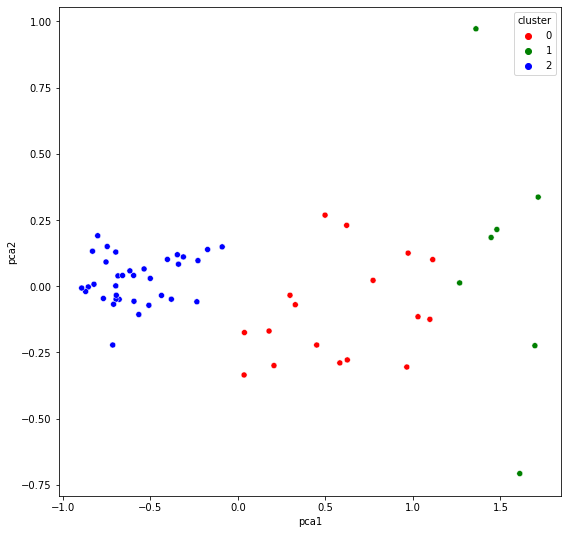

In [22]:
# network
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(pred_friend)
pca_df= pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels_friend})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df, palette = ['red','green','blue'])
#palette = ['red','green','blue','pink','brown','yellow']

In [23]:
#model autoencoder data community
input_df = Input( shape = (59, ))
x = Dense(59, activation = 'relu')(input_df)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(50, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(20, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(50, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(59, kernel_initializer='glorot_uniform')(x)
autoencoder_community = Model(input_df, decoded)
encoder_community = Model(input_df, encoded)
autoencoder_community.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

In [24]:
#training data community
autoencoder_community.fit(C_community, C_community, batch_size= 120, epochs = 30, verbose = 1)

Epoch 1/30
1/1 [==============================] - 1s 735ms/step - loss: 0.5883 - accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 0s 4ms/step - loss: 0.5780 - accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 0s 6ms/step - loss: 0.5692 - accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 0s 5ms/step - loss: 0.5609 - accuracy: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 0s 5ms/step - loss: 0.5526 - accuracy: 0.0169
Epoch 6/30
1/1 [==============================] - 0s 10ms/step - loss: 0.5439 - accuracy: 0.0339
Epoch 7/30
1/1 [==============================] - 0s 7ms/step - loss: 0.5346 - accuracy: 0.0508
Epoch 8/30
1/1 [==============================] - 0s 9ms/step - loss: 0.5253 - accuracy: 0.0508
Epoch 9/30
1/1 [==============================] - 0s 4ms/step - loss: 0.5159 - accuracy: 0.0508
Epoch 10/30
1/1 [==============================] - 0s 6ms/step - loss: 0.5065 - accuracy: 0.0508
Epoch 11/30
1/1 [===

In [25]:
#predect data compression
pred_community = encoder_community.predict(C_community)

In [26]:
spectral = SpectralClustering(n_clusters=4)
spectral.fit_predict(pred_community)
labels_community = spectral.labels_
#metrics
silhouette_avg = silhouette_score(pred_community, labels_community)
Davies_M= sklearn.metrics.davies_bouldin_score(pred_community, labels_community)
Calinski_Harabaz=metrics.calinski_harabasz_score(pred_community, labels_community)  

print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

52.39177149692292
0.9281113805409451
0.41756105


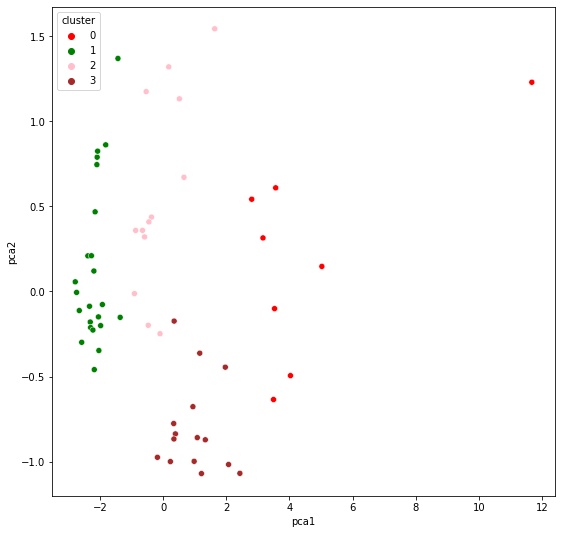

In [27]:
# network
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(pred_community)
pca_df= pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels_community})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df, palette = ['red','green','pink','brown'])
#palette = ['red','green','blue','pink','brown','yellow']

In [85]:
M = np.zeros((59,59),dtype='float')
k=0
for i in range(58):
  for j in range(i+1,59):
    if(labels_friend[i]==labels_friend[j]):
      k+=0.025
    if(labels_community[i]==labels_community[j]):
      k+=0.075    
    M[i][j]=k
    M[j][i]=k
    k=0

In [86]:
#trouver le i_leader
B_M=np.sum(M,axis=0)
l_M=B_M.tolist()
i_leader=l_M.index(max(l_M))

In [ ]:
#M modifié
l3=list(range(59))
A=M
o_M=[]
l3.remove(i_leader)
l4=[]
l5=[]
print(i_leader)
while (len(l3)!=0):
  t2=time.time()
  for i in range(len(l3)):
    r=np.sum(np.square(A[i_leader]-A[l3[i]]))
    l4.append(r)
    l5.append(l3[i])
  o_M.append(i_leader)   
  i_leader = l5[l4.index(min(l4))]
  l3.remove(i_leader)
  l4=[]
  l5=[]
  print(time.time()-t2)
o_M.append(i_leader)  
print(l3)
print(len(o_M)) 
print(o_M)

In [88]:
C_M = np.zeros((59,59),dtype='float')
for i in range(59):
  for j in range(59):
    C_M[i][j]=M[o_M[i]][o_M[j]]

In [32]:
#model autoencoder data community
input_df = Input( shape = (59, ))
x = Dense(59, activation = 'relu')(input_df)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(50, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(20, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(50, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(59, kernel_initializer='glorot_uniform')(x)
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [89]:
#training data 
autoencoder_community.fit(C_M, C_M, batch_size= 120, epochs = 30, verbose = 1)

Epoch 1/30
1/1 [==============================] - 0s 5ms/step - loss: 4.9231e-04 - accuracy: 0.0169
Epoch 2/30
1/1 [==============================] - 0s 9ms/step - loss: 4.8885e-04 - accuracy: 0.0169
Epoch 3/30
1/1 [==============================] - 0s 7ms/step - loss: 4.8524e-04 - accuracy: 0.0169
Epoch 4/30
1/1 [==============================] - 0s 8ms/step - loss: 4.8148e-04 - accuracy: 0.0169
Epoch 5/30
1/1 [==============================] - 0s 6ms/step - loss: 4.7761e-04 - accuracy: 0.0169
Epoch 6/30
1/1 [==============================] - 0s 7ms/step - loss: 4.7366e-04 - accuracy: 0.0169
Epoch 7/30
1/1 [==============================] - 0s 5ms/step - loss: 4.6965e-04 - accuracy: 0.0169
Epoch 8/30
1/1 [==============================] - 0s 4ms/step - loss: 4.6563e-04 - accuracy: 0.0169
Epoch 9/30
1/1 [==============================] - 0s 7ms/step - loss: 4.6162e-04 - accuracy: 0.0169
Epoch 10/30
1/1 [==============================] - 0s 7ms/step - loss: 4.5764e-04 - accuracy: 0.0169

In [90]:
pred_M = encoder.predict(C_M)

In [91]:
pred_M

array([[8.1995577e-02, 5.3689210e-04, 1.2003783e-02, ..., 0.0000000e+00,
        9.2308242e-03, 3.8774401e-02],
       [8.1241302e-02, 3.5713778e-03, 1.6278742e-02, ..., 0.0000000e+00,
        3.2203165e-03, 4.7909342e-02],
       [8.4214106e-02, 0.0000000e+00, 8.0617527e-03, ..., 0.0000000e+00,
        7.3496634e-03, 5.2567035e-02],
       ...,
       [3.5685604e-03, 1.0998534e-02, 0.0000000e+00, ..., 1.8906387e-02,
        1.8269233e-02, 1.8972788e-02],
       [1.2554401e-02, 2.0992011e-06, 0.0000000e+00, ..., 1.9833798e-02,
        9.6935220e-03, 2.0133559e-02],
       [8.7033026e-03, 9.4148545e-03, 0.0000000e+00, ..., 1.0220842e-02,
        6.1191008e-03, 1.9623265e-02]], dtype=float32)

In [92]:
spectral = SpectralClustering(n_clusters=4)
spectral.fit_predict(pred_M)
labels_M = spectral.labels_
#metrics
silhouette_avg = silhouette_score(pred_M, labels_M)
Davies_M= sklearn.metrics.davies_bouldin_score(pred_M, labels_M)
Calinski_Harabaz=metrics.calinski_harabasz_score(pred_M, labels_M)  

print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

93.56139297357994
1.0247938296246801
0.43742317


In [ ]:
fichier = open("l59relation_spectralAE.txt", "w")
st=""
for i in labels_finale:
  st=str(i)
  fichier.write(st+" ")
fichier.write(st+"\n")    
fichier.close()

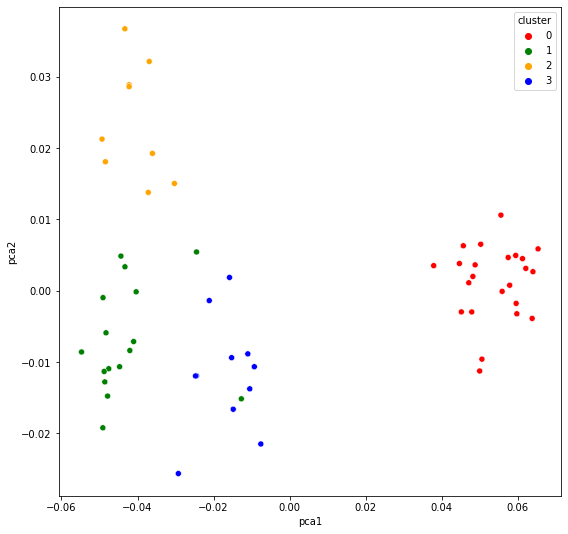

In [93]:
# network
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(pred_M)
pca_df= pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels_M})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df, palette = ['red','green','orange','blue'])
#palette = ['red','green','blue','pink','brown','yellow']